In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
import cmath
from scipy import fftpack

In [32]:
fs=16*40
tPeriod = 1/fs
timeTotal = 2*tPeriod
t=np.linspace(0,timeTotal,100,endpoint = True)
y=np.sin(2*m.pi*fs*t)

Text(0.5, 1.0, 'Sine Wave')

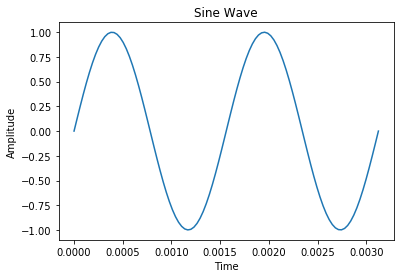

In [33]:
plt.plot(t,y)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sine Wave')

In [34]:
pi2 = cmath.pi * 2.0 
def DFT(xn,N):
    xk = []
    for m in range(N):
        y = 0.0
        for n in range(N):
            y += xn[n] * cmath.exp(- 1j * pi2 * m * n / N)
        xk.append(round(y))
    return xk

Text(0.5, 1.0, 'FFT plot')

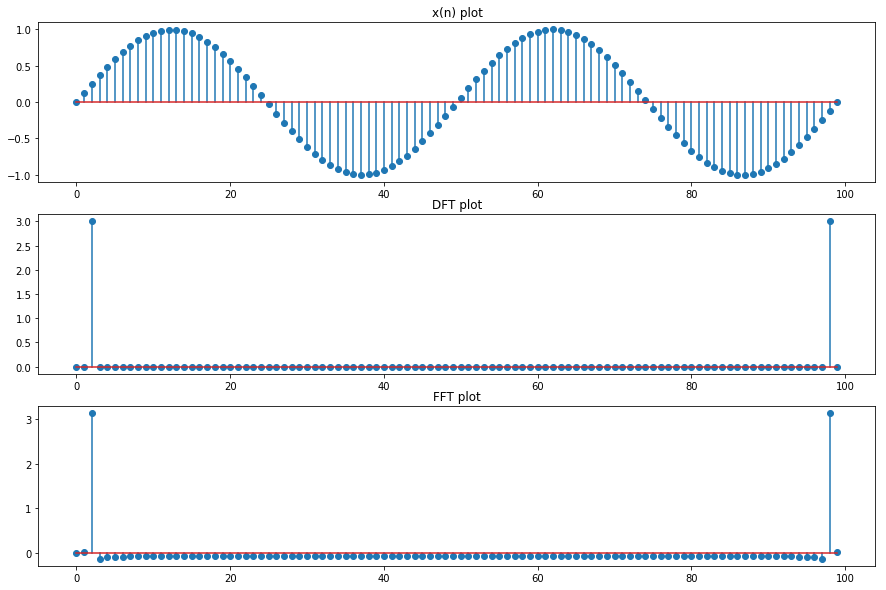

In [35]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,10))
ax1.stem(y)
ax1.set_title('x(n) plot')
ax2.stem(DFT(y,len(y)))
ax2.set_title('DFT plot')
ax3.stem(fftpack.fft(y))
ax3.set_title('FFT plot')

In [36]:
%timeit DFT(y,len(y))
%timeit fftpack.fft(y)

48 ms ± 3.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
7 µs ± 851 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [37]:
x = np.linspace(1,40,16*5)
print("The length of the sequence is ",len(x))
print("The sequence is ",x)

The length of the sequence is  80
The sequence is  [ 1.          1.49367089  1.98734177  2.48101266  2.97468354  3.46835443
  3.96202532  4.4556962   4.94936709  5.44303797  5.93670886  6.43037975
  6.92405063  7.41772152  7.91139241  8.40506329  8.89873418  9.39240506
  9.88607595 10.37974684 10.87341772 11.36708861 11.86075949 12.35443038
 12.84810127 13.34177215 13.83544304 14.32911392 14.82278481 15.3164557
 15.81012658 16.30379747 16.79746835 17.29113924 17.78481013 18.27848101
 18.7721519  19.26582278 19.75949367 20.25316456 20.74683544 21.24050633
 21.73417722 22.2278481  22.72151899 23.21518987 23.70886076 24.20253165
 24.69620253 25.18987342 25.6835443  26.17721519 26.67088608 27.16455696
 27.65822785 28.15189873 28.64556962 29.13924051 29.63291139 30.12658228
 30.62025316 31.11392405 31.60759494 32.10126582 32.59493671 33.08860759
 33.58227848 34.07594937 34.56962025 35.06329114 35.55696203 36.05063291
 36.5443038  37.03797468 37.53164557 38.02531646 38.51898734 39.01265823
 

In [38]:
def conv(x,h):
    N1 = len(x)
    N2 = len(h)
    N = N1+N2-1
    y = np.zeros(N)


    m = N-N1
    n = N-N2

    #Padding zeros to x and h to make their length to N
    x =np.pad(x,(0,m),'constant')
    h =np.pad(h,(0,n),'constant')


    #Linear convolution
    for n in range (N):
        for k in range (N):
            y[n] = y[n]+x[n-k]*h[k]
    
    return y

Text(0.5, 1.0, 'FFT plot')

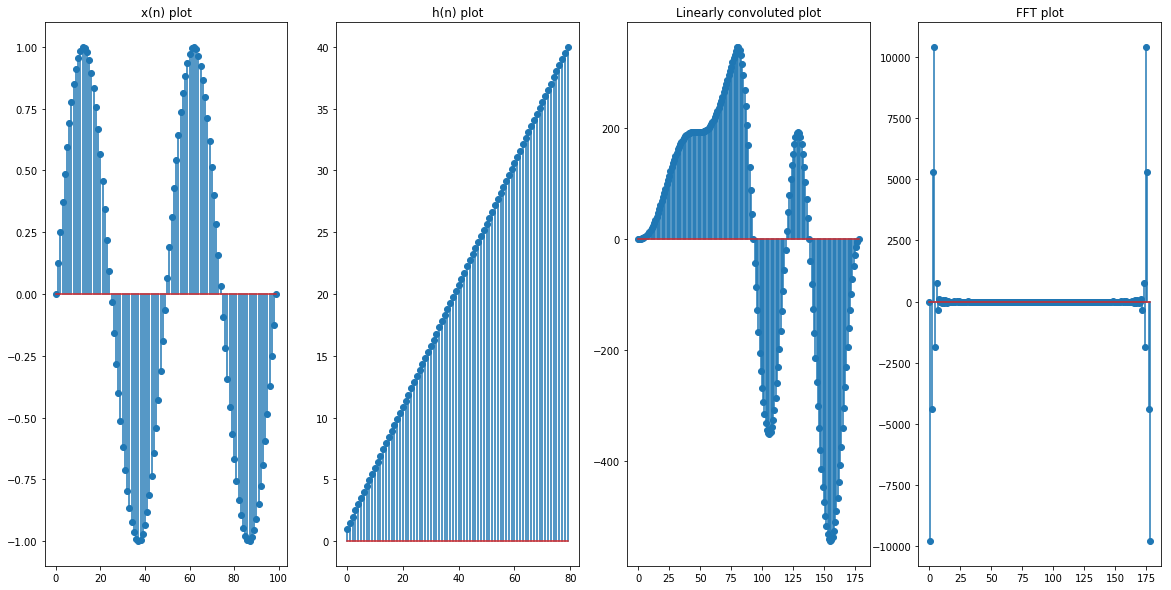

In [44]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(20,10))
ax1.stem(y)
ax1.set_title('x(n) plot')
ax2.stem(x)
ax2.set_title('h(n) plot')
ax3.stem(conv(y,x))
ax3.set_title('Linearly convoluted plot')
ax4.stem(fftpack.fft(conv(y,x)))
ax4.set_title('FFT plot')

Text(0.5, 1.0, 'FFT plot')

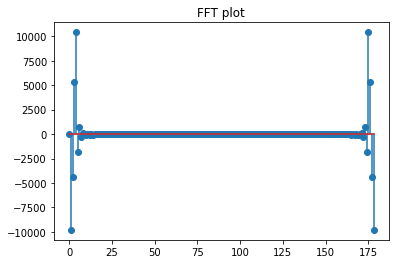

In [48]:
plt.stem(fftpack.fft(conv(y,x)))
plt.title('FFT plot')

Text(0.5, 1.0, 'Inverse FFT plot')

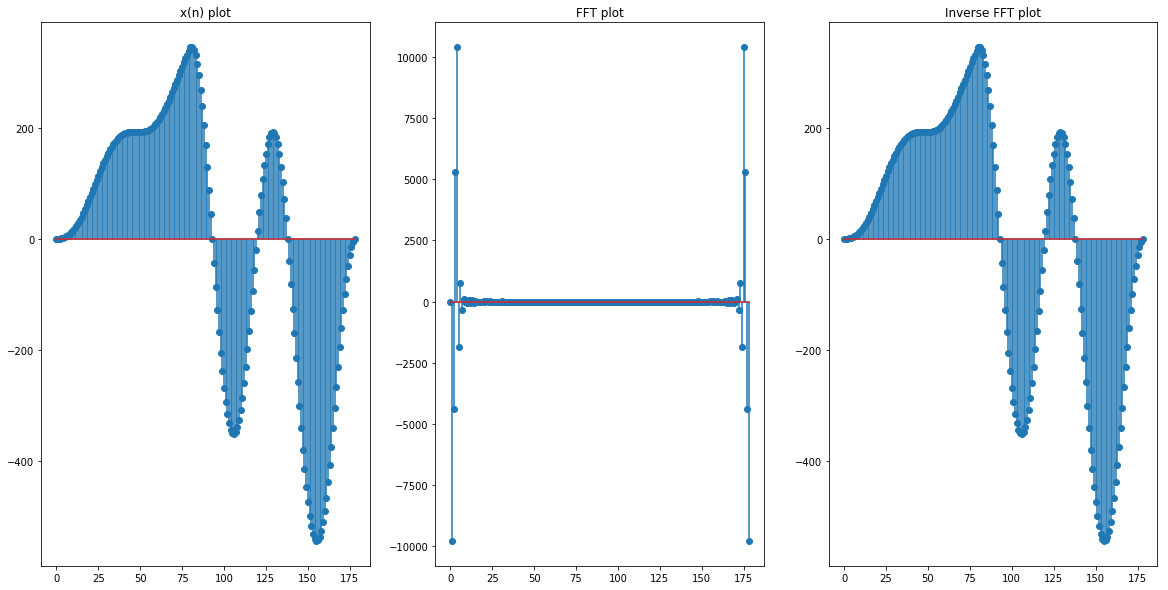

In [50]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,10))
ax1.stem(conv(y,x))
ax1.set_title('x(n) plot')
ax2.stem(fftpack.fft(conv(y,x)))
ax2.set_title('FFT plot')
ax3.stem(fftpack.ifft(fftpack.fft(conv(y,x))))
ax3.set_title('Inverse FFT plot')

Text(0.5, 1.0, 'Inverse FFT plot')

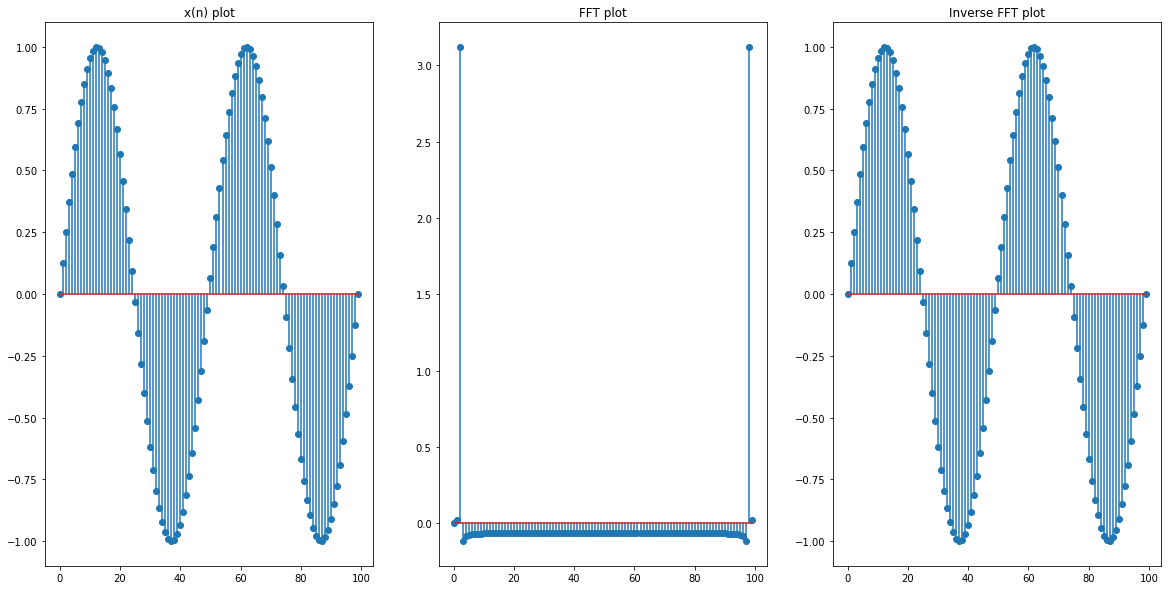

In [52]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,10))
ax1.stem(y)
ax1.set_title('x(n) plot')
ax2.stem(fftpack.fft(y))
ax2.set_title('FFT plot')
ax3.stem(fftpack.ifft(fftpack.fft(y)))
ax3.set_title('Inverse FFT plot')